In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# changing the format into numpy array
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training set

data_dev = data[0:1000].T #.T is transpose
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
_,m_train = X_train.shape

In [5]:
Y_train

array([8, 5, 7, ..., 9, 5, 0])

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)  # finding maximum value and if less than 0 become 0

def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def foward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+ b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):  # print new matrix of one hot Y
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  # assume the classes to be between 0 to 9
    one_hot_Y[np.arange(Y.size), Y] = 1 # create an array
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ2.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    
    

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = foward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 100, 0.10)

Iteration:  0
[4 4 4 ... 4 2 1] [8 5 7 ... 9 5 0]
Accuracy:  0.09990243902439025
Iteration:  10
[3 9 4 ... 4 3 4] [8 5 7 ... 9 5 0]
Accuracy:  0.048682926829268294
Iteration:  20
[9 3 7 ... 1 7 0] [8 5 7 ... 9 5 0]
Accuracy:  0.4158780487804878
Iteration:  30
[1 3 7 ... 1 3 0] [8 5 7 ... 9 5 0]
Accuracy:  0.49865853658536585
Iteration:  40
[8 8 7 ... 4 8 0] [8 5 7 ... 9 5 0]
Accuracy:  0.6362926829268293
Iteration:  50
[1 5 7 ... 9 5 0] [8 5 7 ... 9 5 0]
Accuracy:  0.7396585365853658
Iteration:  60
[8 8 7 ... 9 8 0] [8 5 7 ... 9 5 0]
Accuracy:  0.7609756097560976
Iteration:  70
[8 8 7 ... 4 8 0] [8 5 7 ... 9 5 0]
Accuracy:  0.782609756097561
Iteration:  80
[8 5 7 ... 9 3 0] [8 5 7 ... 9 5 0]
Accuracy:  0.8185853658536585
Iteration:  90
[8 5 7 ... 9 5 0] [8 5 7 ... 9 5 0]
Accuracy:  0.8377560975609756


In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = foward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

1
Prediction:  [8]
Label:  5


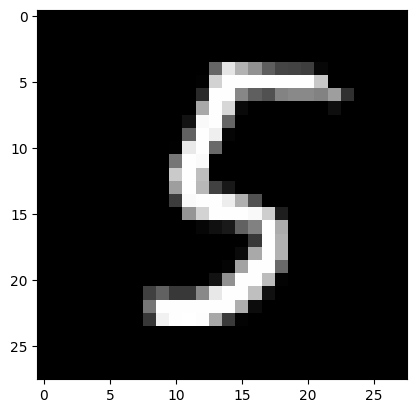

2
Prediction:  [7]
Label:  7


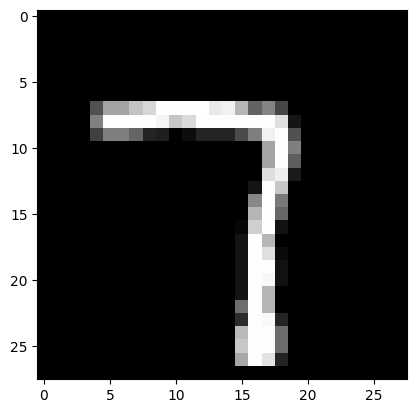

3
Prediction:  [6]
Label:  2


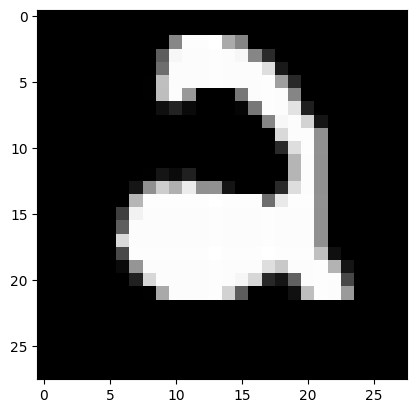

4
Prediction:  [1]
Label:  1


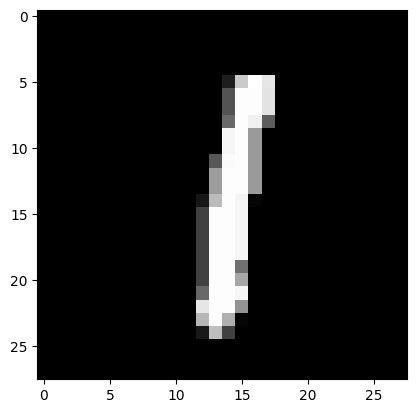

5
Prediction:  [8]
Label:  1


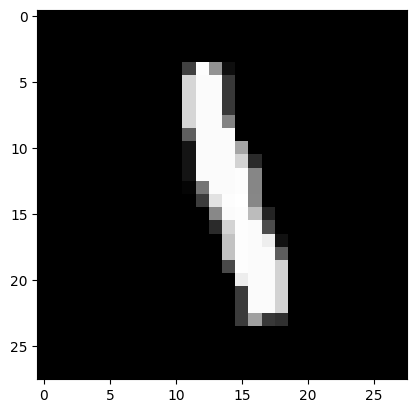

6
Prediction:  [7]
Label:  7


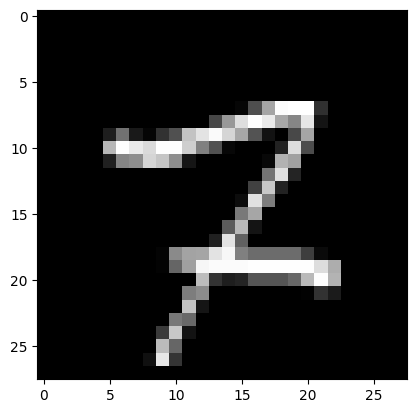

7
Prediction:  [7]
Label:  9


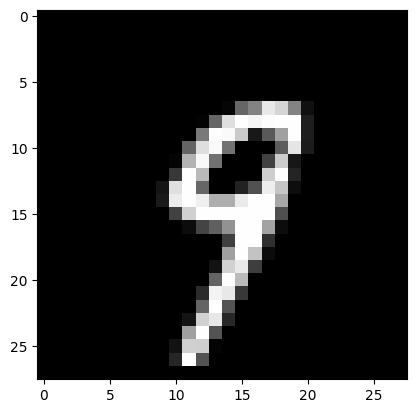

8
Prediction:  [6]
Label:  6


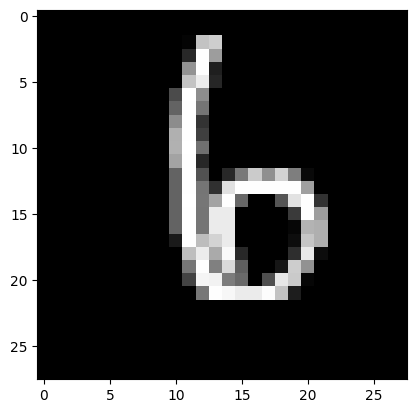

9
Prediction:  [8]
Label:  8


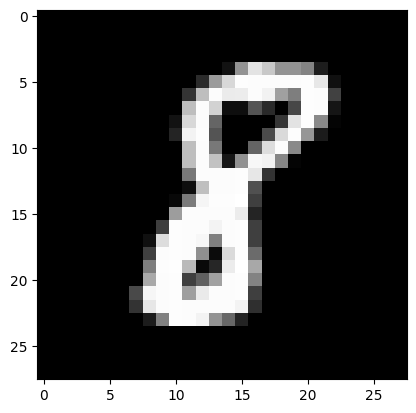

10
Prediction:  [1]
Label:  1


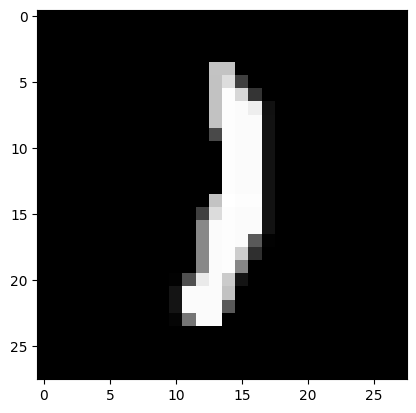

11
Prediction:  [7]
Label:  7


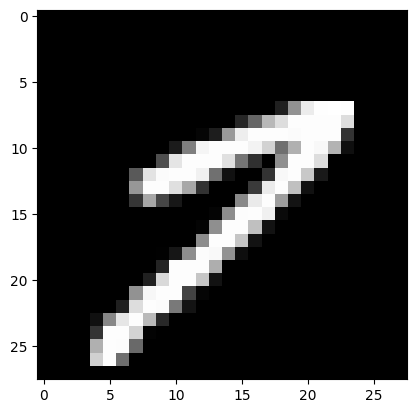

12
Prediction:  [4]
Label:  6


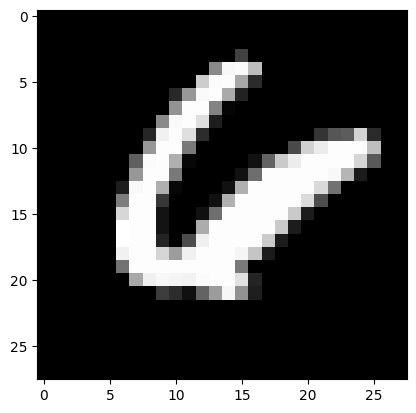

13
Prediction:  [7]
Label:  7


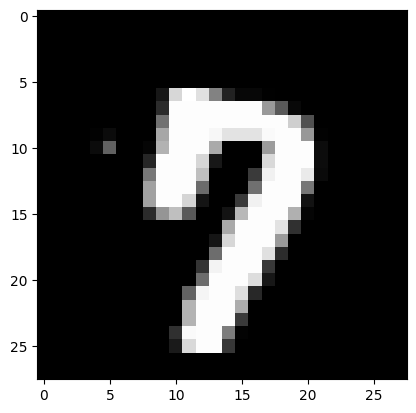

14
Prediction:  [1]
Label:  1


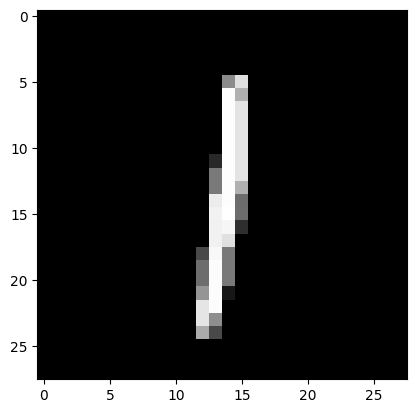

15
Prediction:  [3]
Label:  3


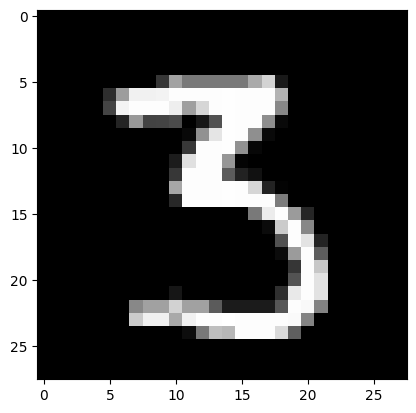

16
Prediction:  [7]
Label:  7


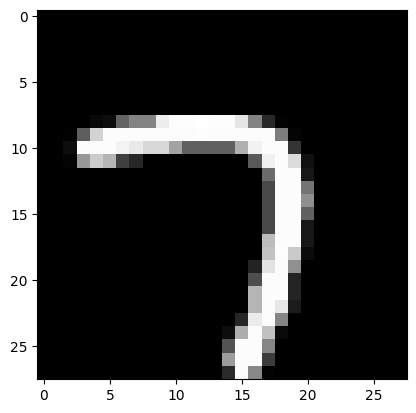

17
Prediction:  [4]
Label:  6


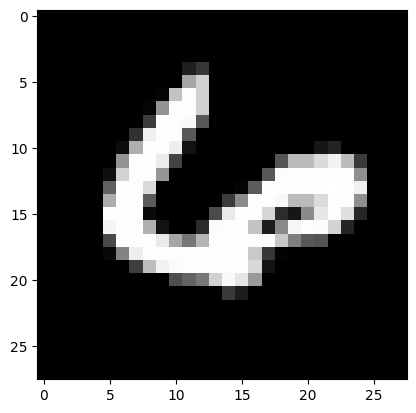

18
Prediction:  [1]
Label:  2


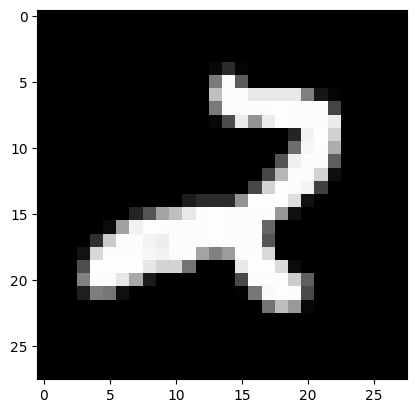

19
Prediction:  [0]
Label:  0


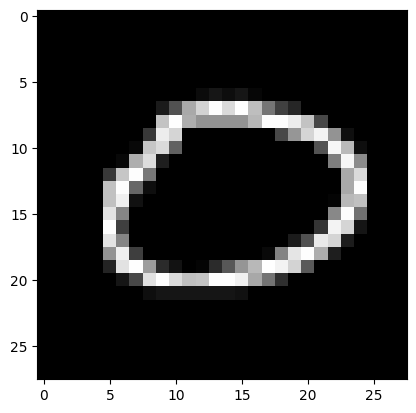

20
Prediction:  [8]
Label:  5


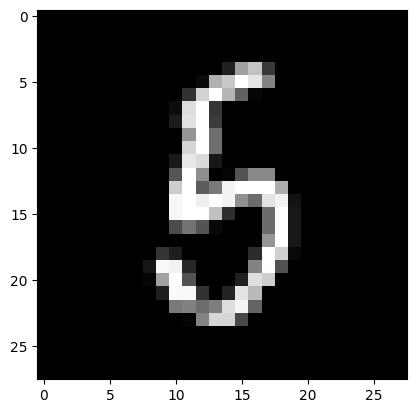

21
Prediction:  [8]
Label:  8


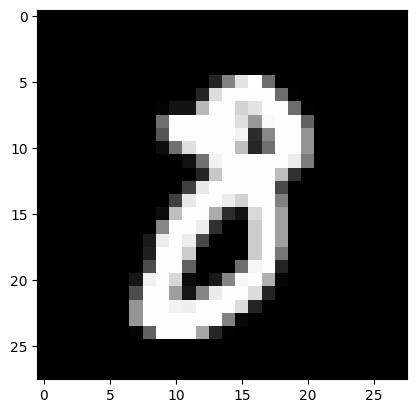

22
Prediction:  [7]
Label:  9


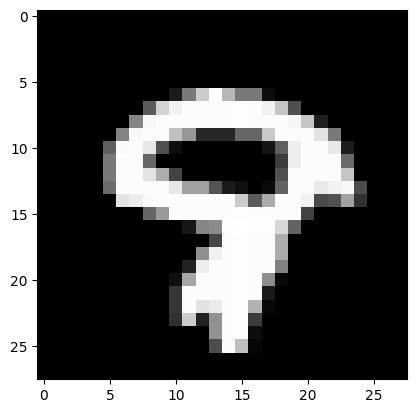

23
Prediction:  [7]
Label:  7


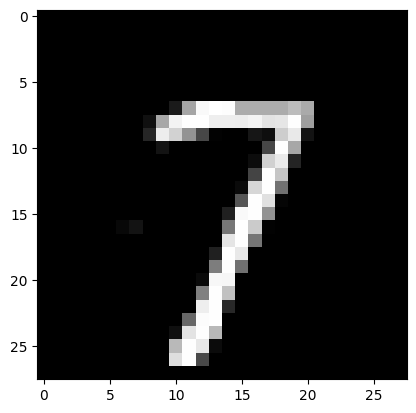

24
Prediction:  [3]
Label:  3


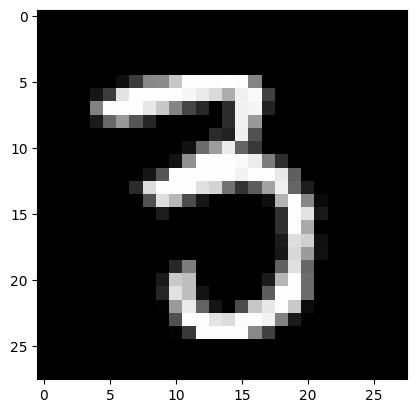

25
Prediction:  [7]
Label:  7


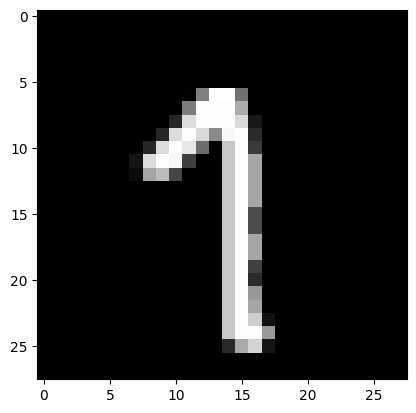

26
Prediction:  [8]
Label:  5


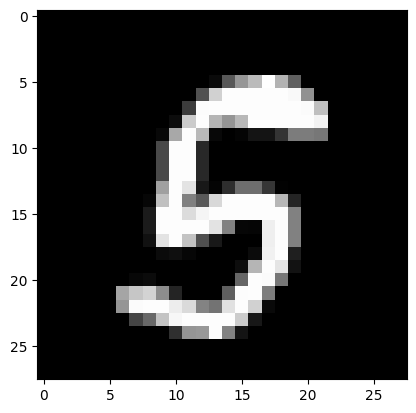

27
Prediction:  [6]
Label:  6


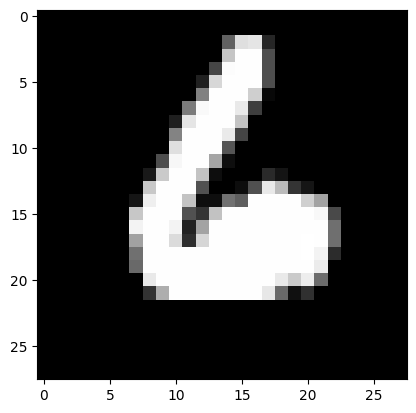

28
Prediction:  [8]
Label:  5


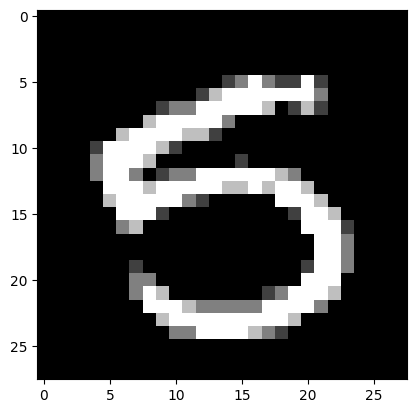

29
Prediction:  [1]
Label:  1


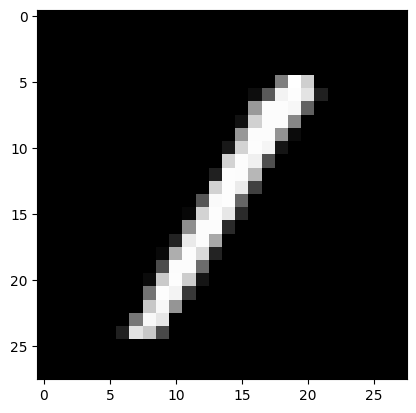

30
Prediction:  [3]
Label:  3


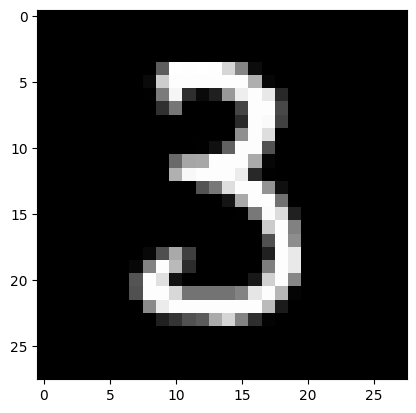

31
Prediction:  [3]
Label:  3


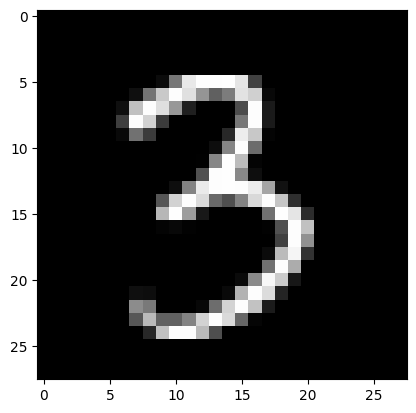

32
Prediction:  [0]
Label:  0


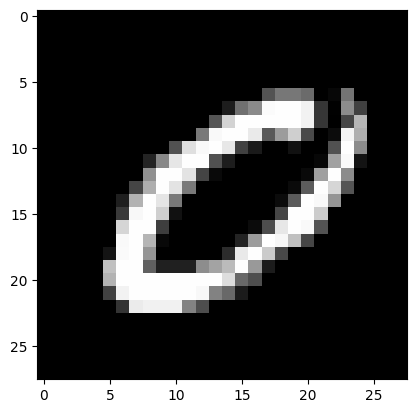

33
Prediction:  [2]
Label:  2


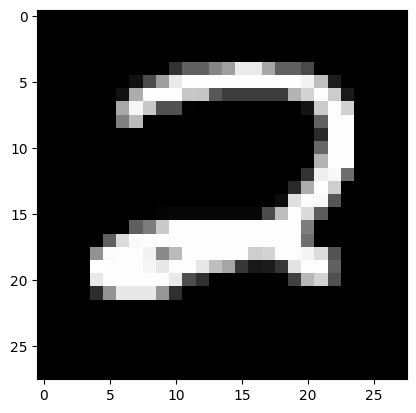

34
Prediction:  [7]
Label:  7


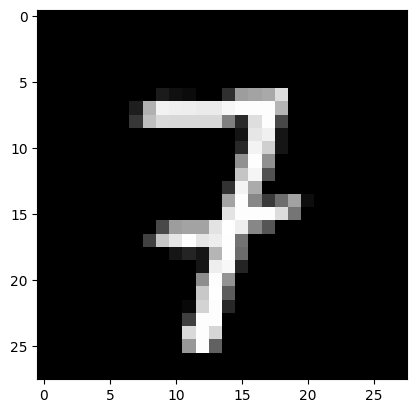

35
Prediction:  [0]
Label:  0


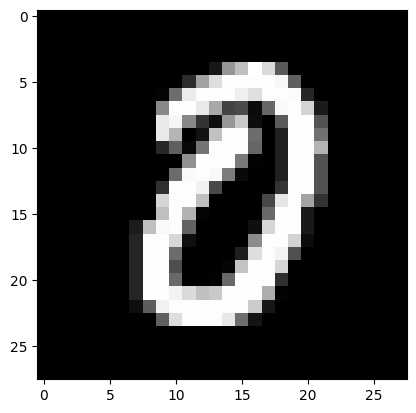

36
Prediction:  [1]
Label:  1


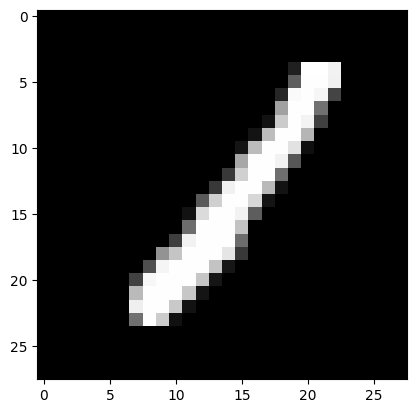

37
Prediction:  [8]
Label:  8


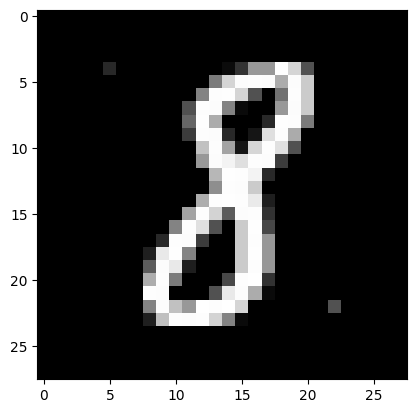

38
Prediction:  [1]
Label:  1


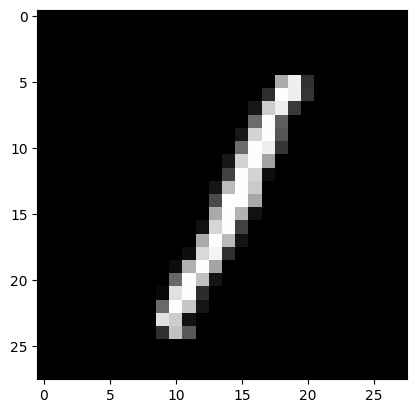

39
Prediction:  [3]
Label:  3


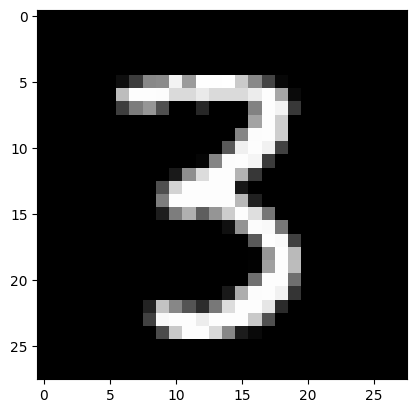

40
Prediction:  [0]
Label:  0


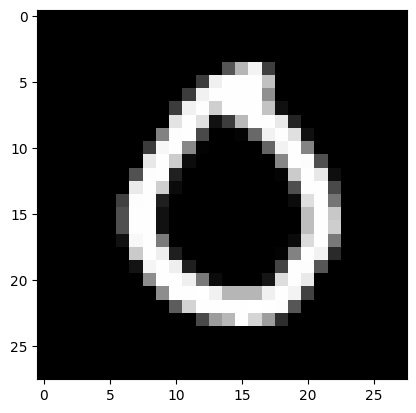

41
Prediction:  [8]
Label:  4


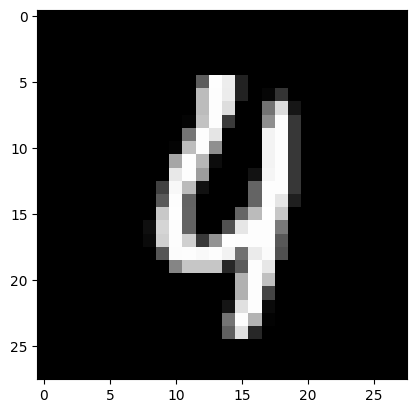

42
Prediction:  [0]
Label:  7


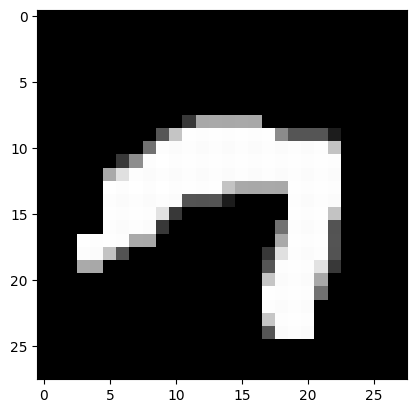

43
Prediction:  [7]
Label:  7


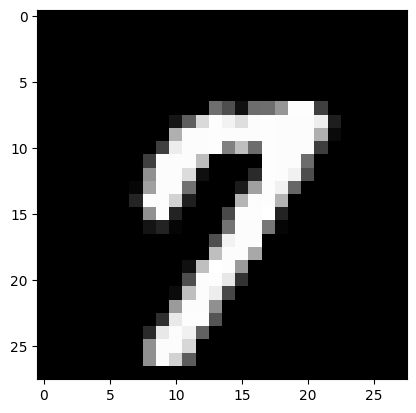

44
Prediction:  [4]
Label:  4


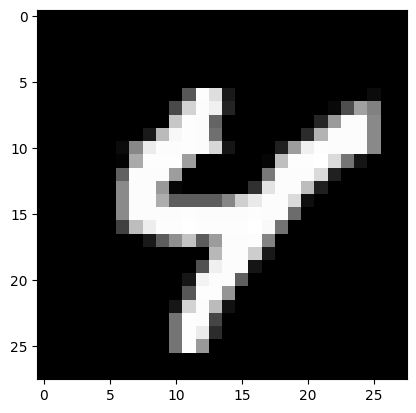

45
Prediction:  [3]
Label:  9


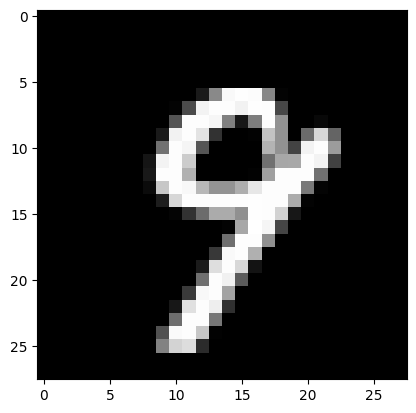

46
Prediction:  [8]
Label:  8


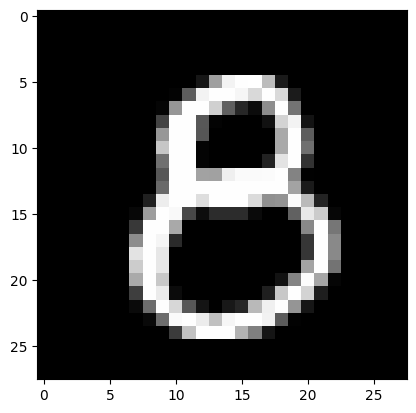

47
Prediction:  [8]
Label:  9


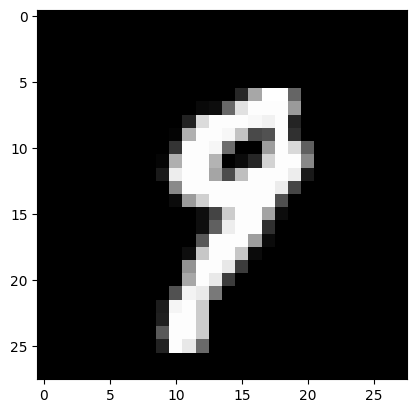

48
Prediction:  [6]
Label:  6


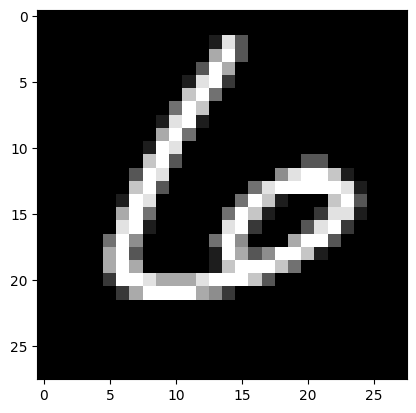

49
Prediction:  [7]
Label:  9


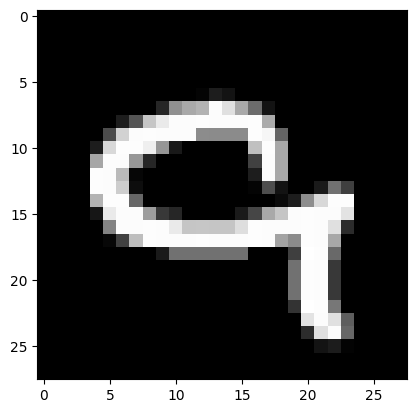

50
Prediction:  [7]
Label:  7


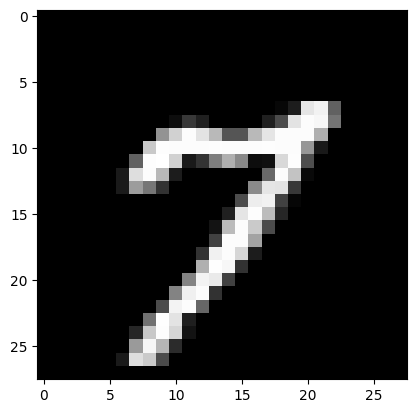

51
Prediction:  [3]
Label:  5


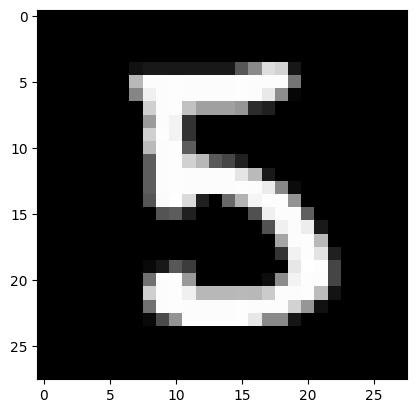

52
Prediction:  [7]
Label:  7


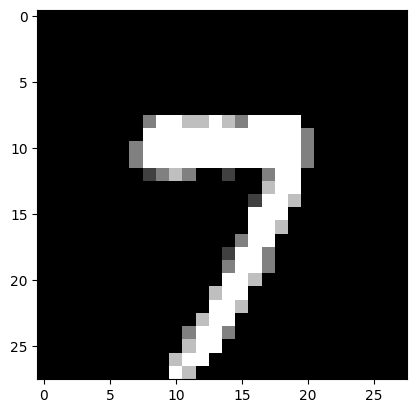

53
Prediction:  [3]
Label:  3


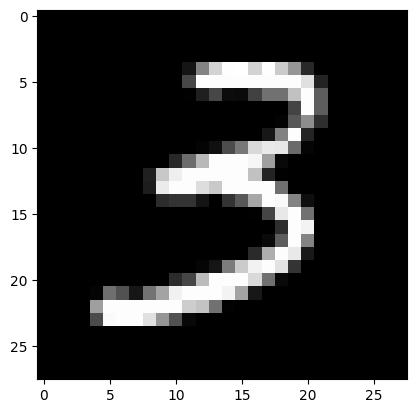

54
Prediction:  [3]
Label:  3


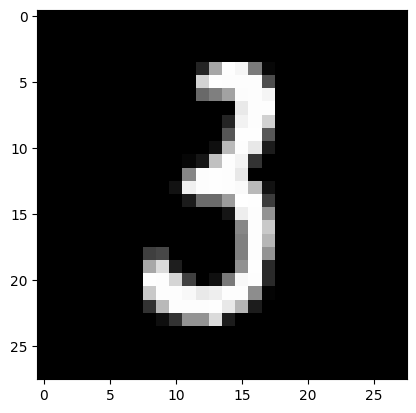

55
Prediction:  [6]
Label:  6


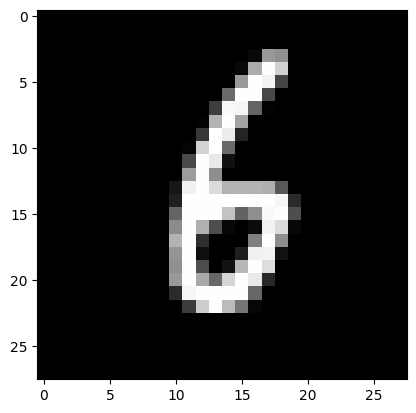

56
Prediction:  [8]
Label:  8


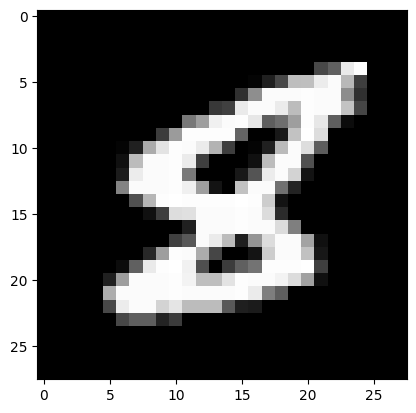

57
Prediction:  [6]
Label:  6


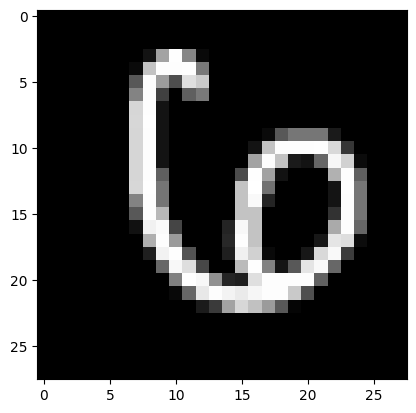

58
Prediction:  [3]
Label:  3


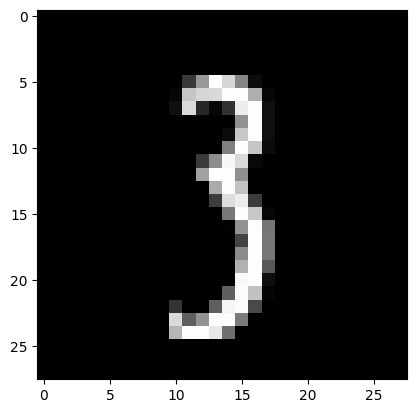

59
Prediction:  [6]
Label:  6


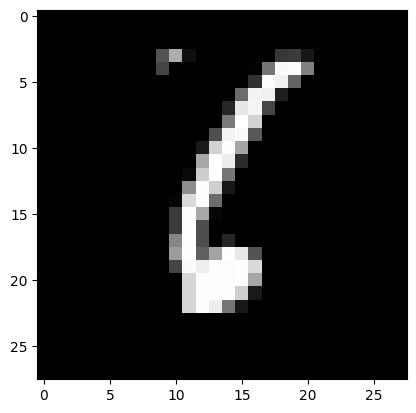

60
Prediction:  [8]
Label:  8


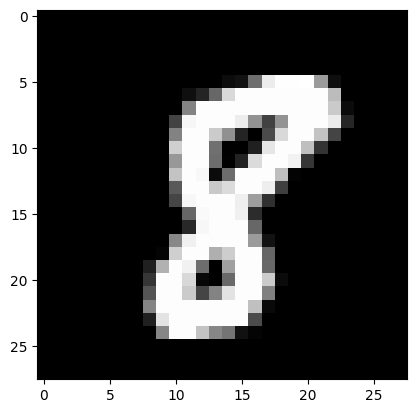

61
Prediction:  [2]
Label:  2


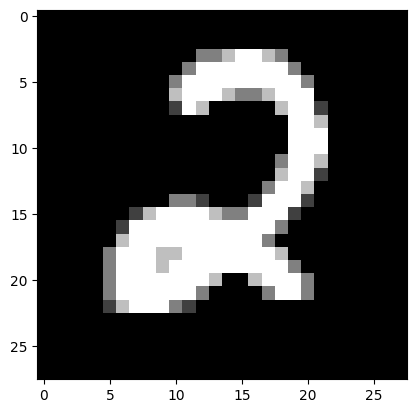

62
Prediction:  [6]
Label:  6


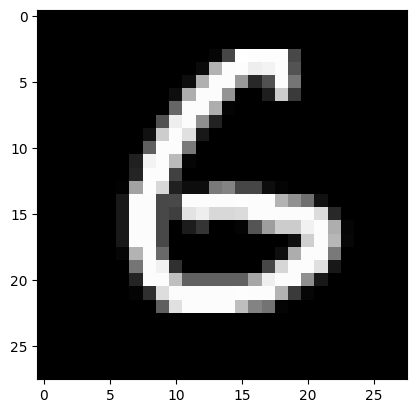

63
Prediction:  [4]
Label:  4


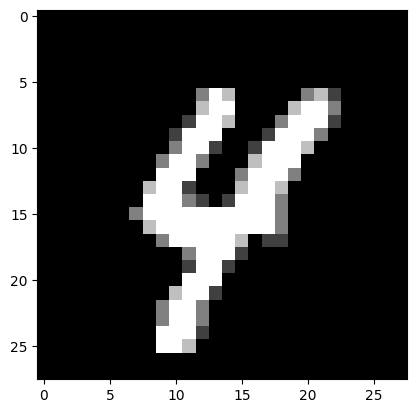

64
Prediction:  [8]
Label:  8


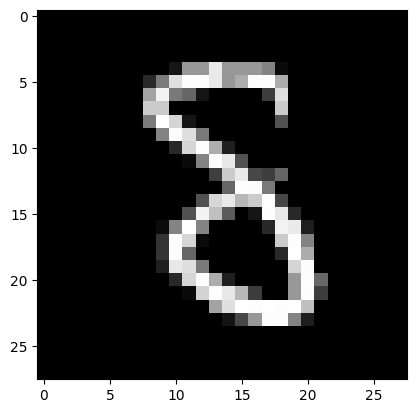

65
Prediction:  [4]
Label:  4


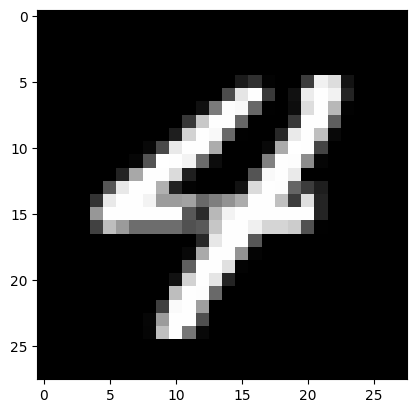

66
Prediction:  [8]
Label:  8


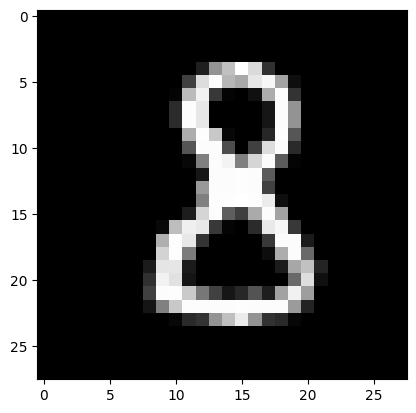

67
Prediction:  [5]
Label:  5


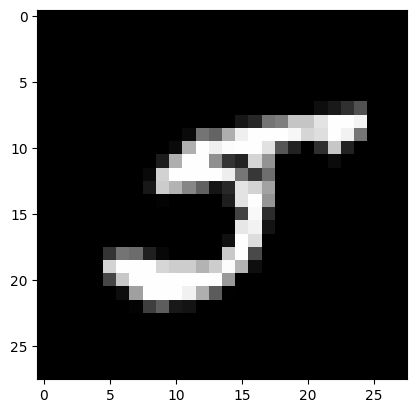

68
Prediction:  [8]
Label:  1


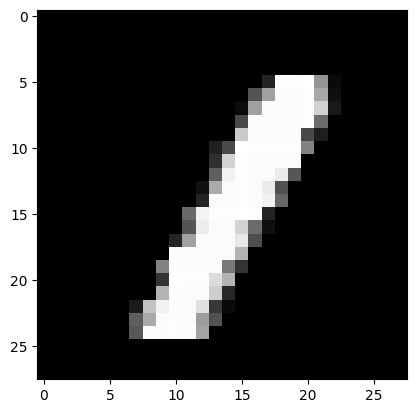

69
Prediction:  [5]
Label:  5


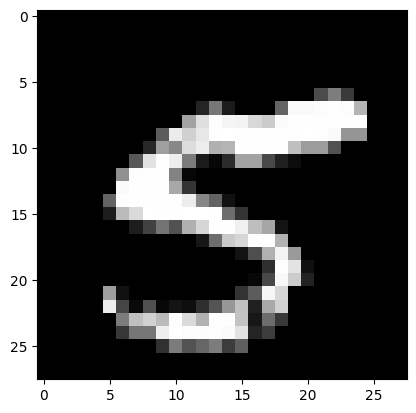

70
Prediction:  [8]
Label:  8


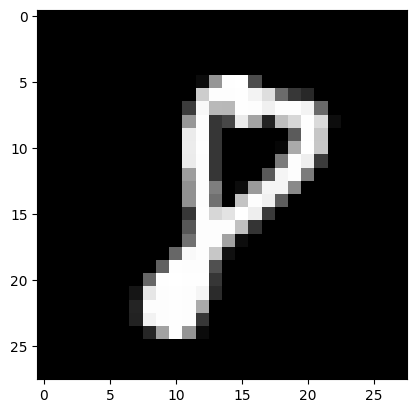

71
Prediction:  [6]
Label:  6


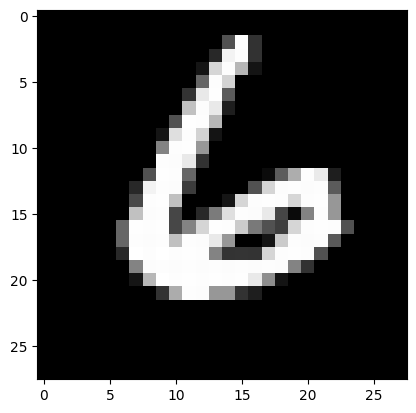

72
Prediction:  [0]
Label:  0


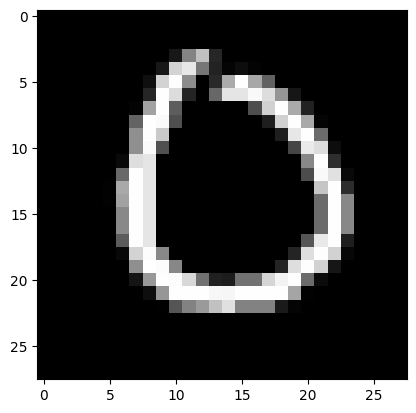

73
Prediction:  [8]
Label:  8


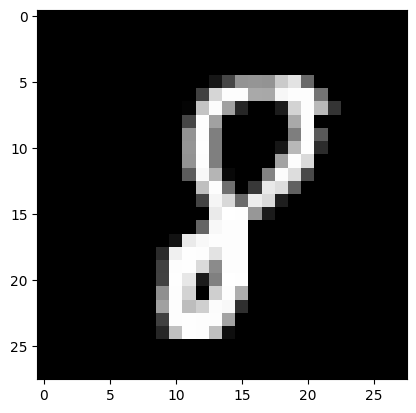

74
Prediction:  [7]
Label:  7


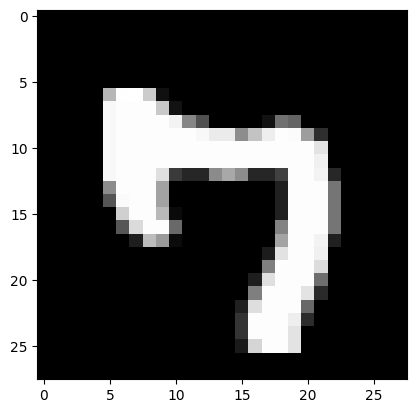

75
Prediction:  [2]
Label:  2


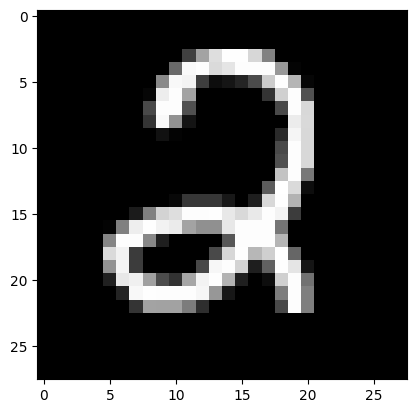

76
Prediction:  [7]
Label:  7


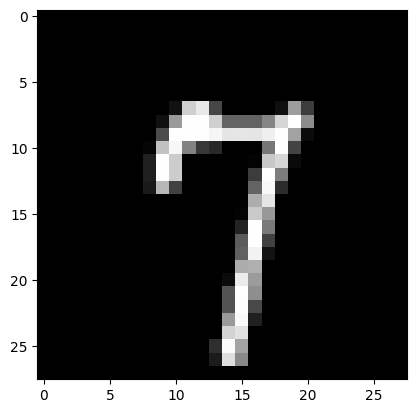

77
Prediction:  [4]
Label:  4


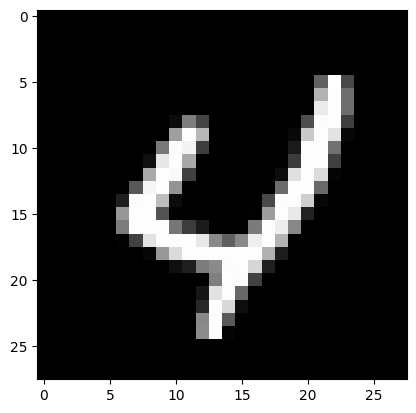

78
Prediction:  [4]
Label:  4


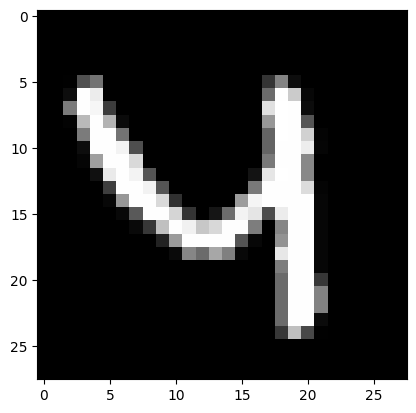

79
Prediction:  [3]
Label:  2


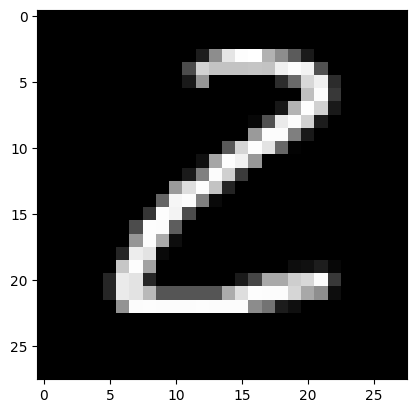

80
Prediction:  [1]
Label:  1


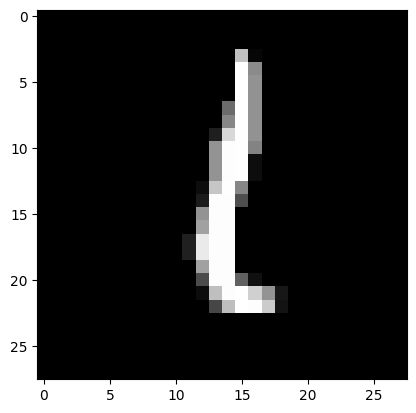

81
Prediction:  [0]
Label:  0


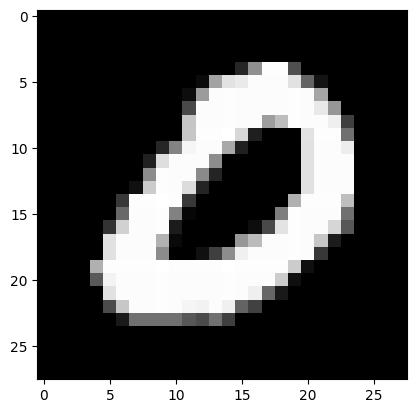

82
Prediction:  [6]
Label:  6


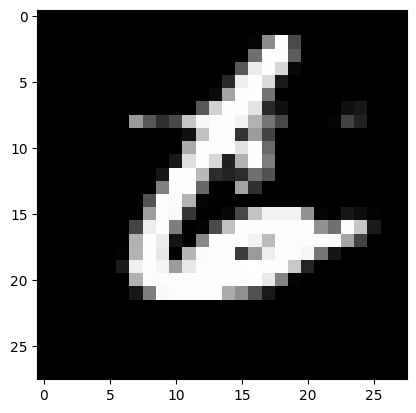

83
Prediction:  [1]
Label:  1


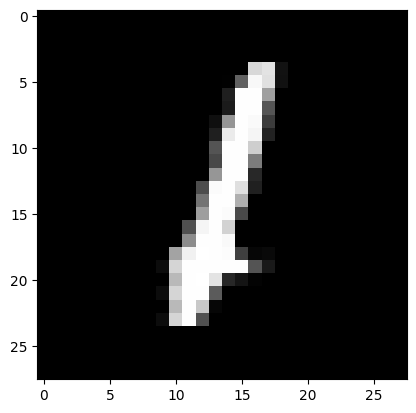

84
Prediction:  [5]
Label:  5


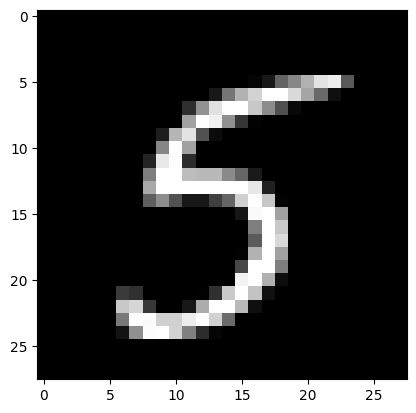

85
Prediction:  [0]
Label:  0


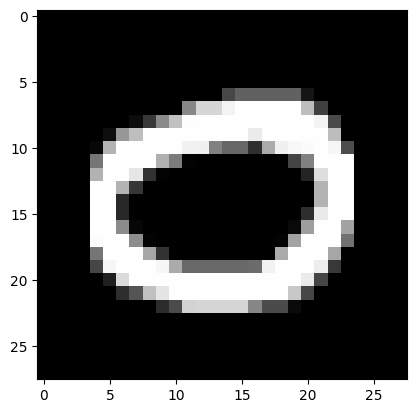

86
Prediction:  [7]
Label:  7


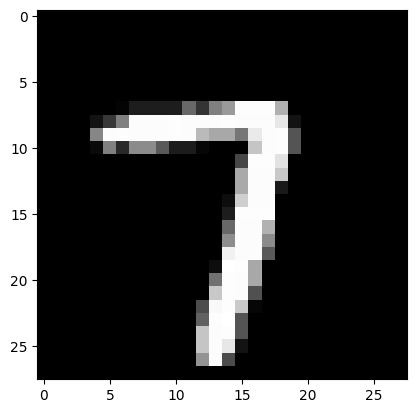

87
Prediction:  [1]
Label:  1


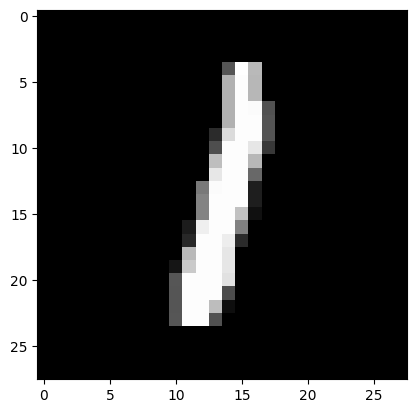

88
Prediction:  [1]
Label:  2


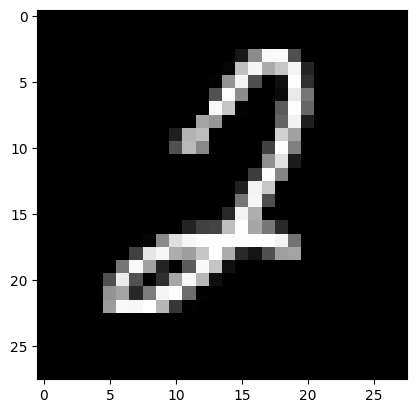

89
Prediction:  [3]
Label:  1


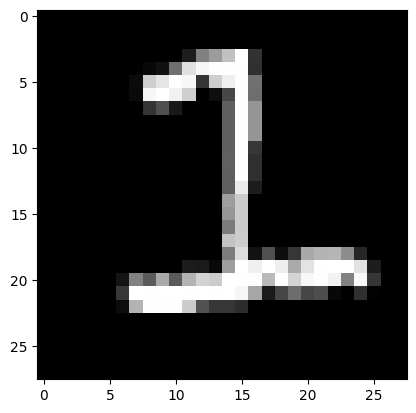

90
Prediction:  [4]
Label:  4


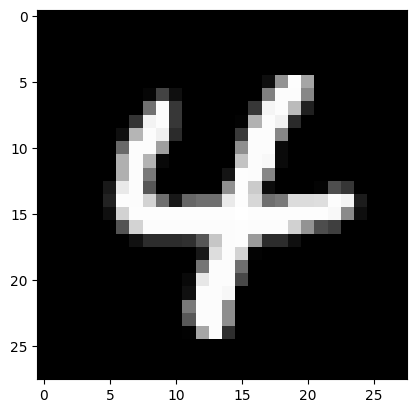

91
Prediction:  [0]
Label:  0


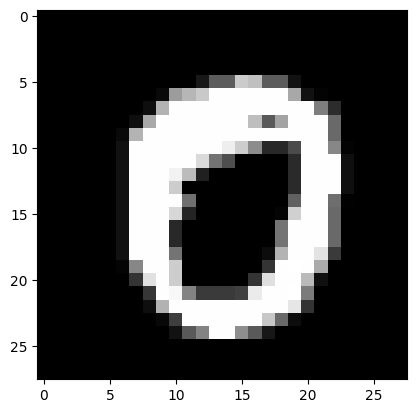

92
Prediction:  [1]
Label:  1


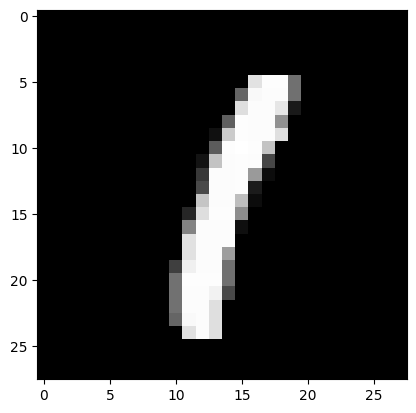

93
Prediction:  [4]
Label:  6


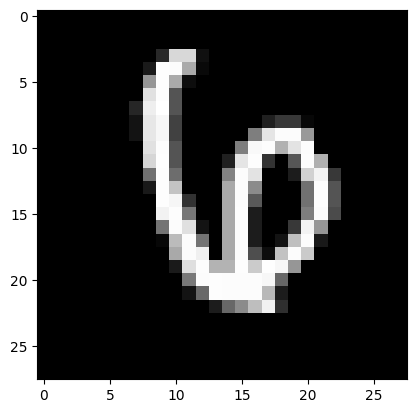

94
Prediction:  [6]
Label:  6


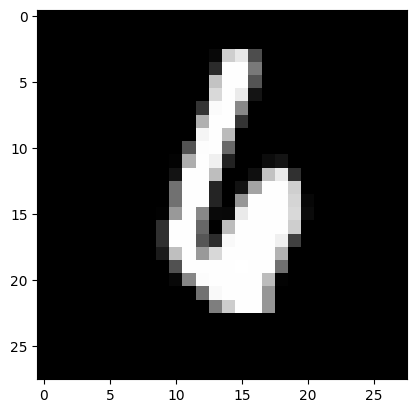

95
Prediction:  [8]
Label:  8


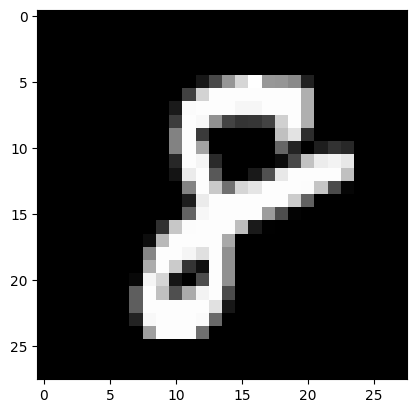

96
Prediction:  [6]
Label:  6


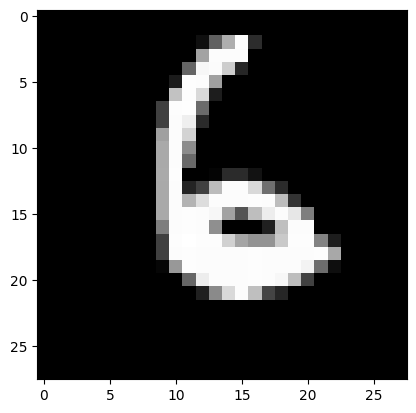

97
Prediction:  [4]
Label:  4


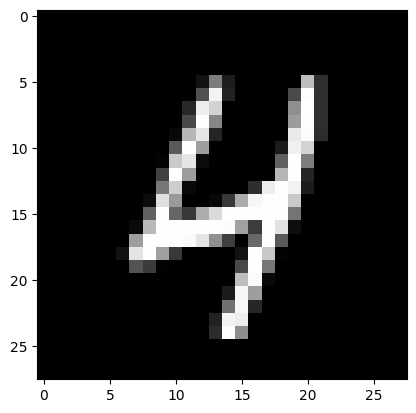

98
Prediction:  [4]
Label:  4


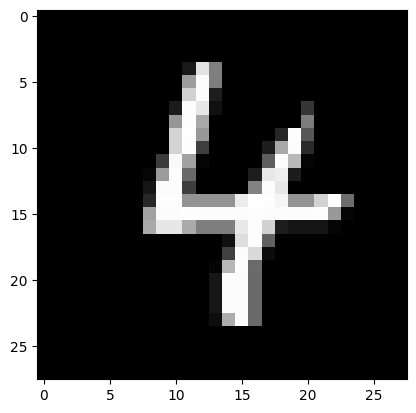

99
Prediction:  [1]
Label:  2


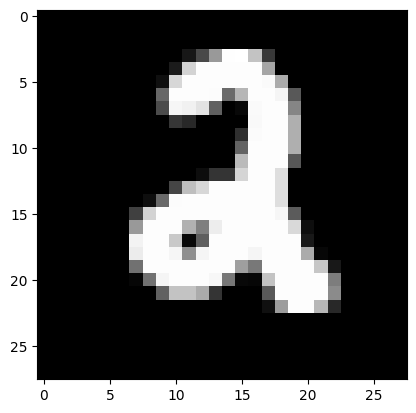

In [16]:
my_range = range(1, 100)
for test in my_range:
    print(test)
    test_prediction(test, W1, b1, W2, b2)